In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_analisis = pd.read_excel("df_procesado.xlsx")
df_analisis_sinind = df_analisis.drop(["Código NIF"],axis = 1)

In [3]:
df_analisis_sinind.head()

,Provincia_Alava,Provincia_Guipuzcoa,Total activo\nmil EUR\n2022,Empresa reciente,Mapeo Sectores_Actividades Profesionales y Financieras,Mapeo Sectores_Comercio,Mapeo Sectores_Construccion e Inmobilarias,Mapeo Sectores_Hosteleria,Mapeo Sectores_Industria,Mapeo Sectores_Transporte,Moneda no euro,Endeudamiento,Solvencia,Evolucion_ventas,ROA
0,False,False,3252348.0,False,False,False,False,False,False,False,False,3,2,4,3
1,False,False,14448655.0,False,True,False,False,False,False,False,True,3,1,4,2
2,False,False,7184141.0,False,False,True,False,False,False,False,False,2,3,1,3
3,False,False,835248.0,False,False,True,False,False,False,False,False,3,2,3,3
4,False,False,53343000.0,False,True,False,False,False,False,False,False,3,0,3,3


In [4]:
corr_pearson = df_analisis_sinind.corr(method="pearson")
corr_spearman = df_analisis_sinind.corr(method="spearman")

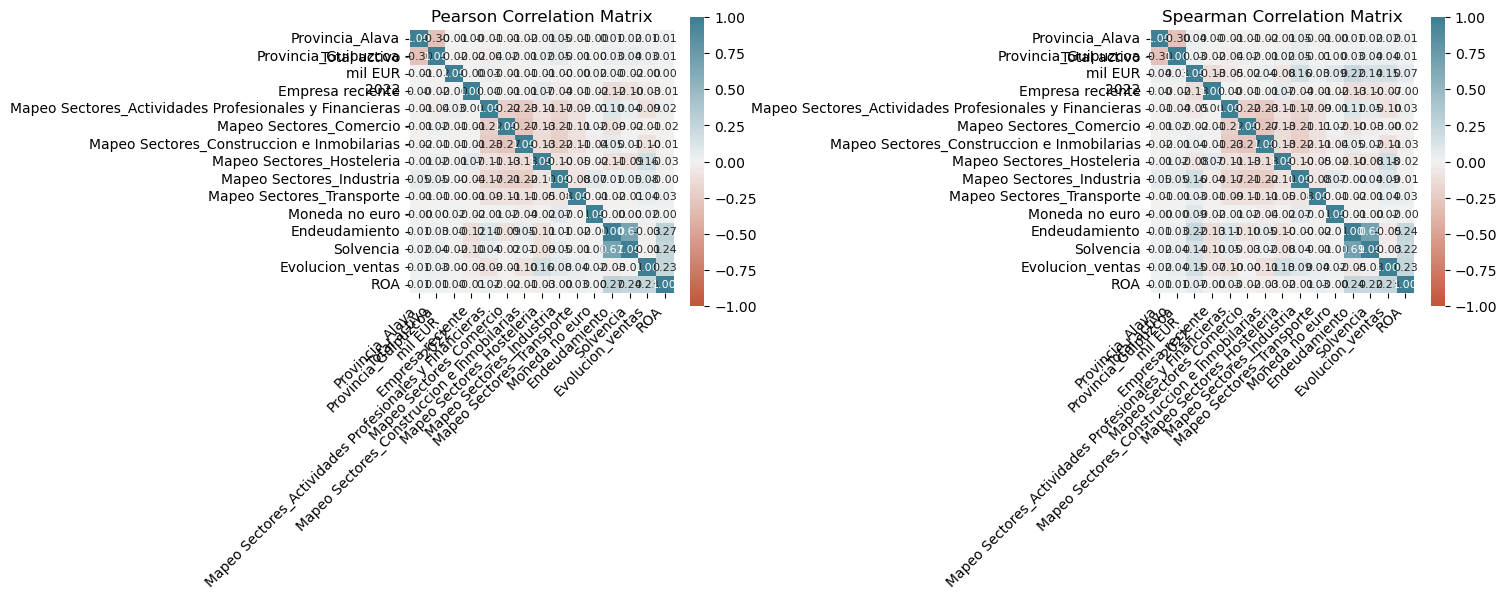

In [5]:
fig, ax =plt.subplots(1,2, figsize=(15,6))

sns.heatmap(corr_pearson, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, ax=ax[0], annot=True, fmt=".2f", annot_kws={"size": 8})
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[0].set_yticklabels(ax[0].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[0].set_title("Pearson Correlation Matrix")

sns.heatmap(corr_spearman, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True, ax=ax[1], fmt=".2f", annot_kws={"size": 8})
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45,horizontalalignment='right')
ax[1].set_yticklabels(ax[1].get_yticklabels(),rotation=0,horizontalalignment='right')
ax[1].set_title("Spearman Correlation Matrix");

plt.tight_layout()

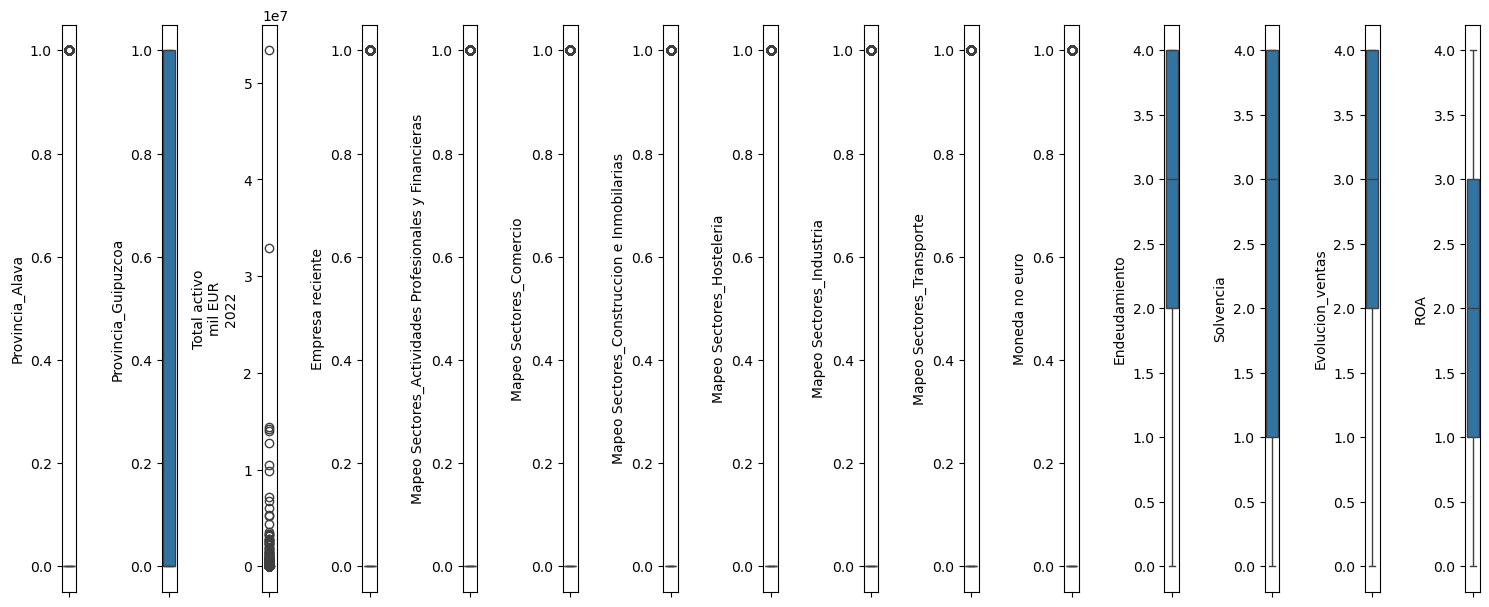

In [6]:
l = df_analisis.drop(["Código NIF"],axis = 1).columns.values
number_of_columns = len(l)
plt.figure(figsize=(number_of_columns,12))
for i in range(0,len(l)):
    plt.subplot(2,number_of_columns,i+1)
    sns.boxplot(df_analisis[l[i]])
    plt.ylabel(l[i])
    plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x22bf8e0fd00>,
 'caps': [<matplotlib.lines.Line2D at 0x22bf8e1b550>,
 'boxes': [<matplotlib.lines.Line2D at 0x22bf8dc2d00>],
 'medians': [<matplotlib.lines.Line2D at 0x22bf86bc460>],
 'fliers': [<matplotlib.lines.Line2D at 0x22bf86bc700>],
 'means': []}

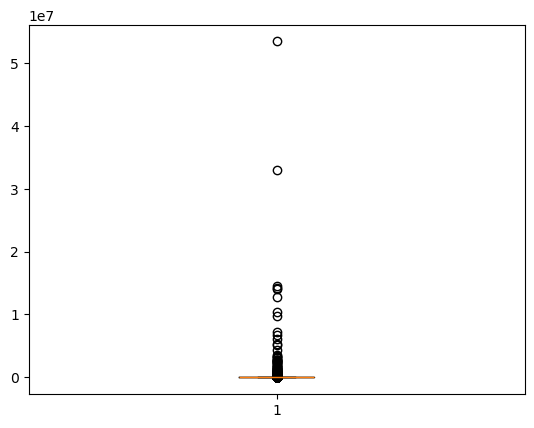

In [7]:
plt.boxplot(df_analisis["Total activo\nmil EUR\n2022"])

In [8]:
df_analisis["Total activo\nmil EUR\n2022"].describe()

count    2.935800e+04
mean     1.365031e+04
std      4.249374e+05
min      2.757000e-02
25%      1.435177e+02
50%      4.328766e+02
75%      1.541833e+03
max      5.334300e+07
Name: Total activo\nmil EUR\n2022, dtype: float64

In [9]:
q1 = np.percentile(df_analisis["Total activo\nmil EUR\n2022"], 25)
q3 = np.percentile(df_analisis["Total activo\nmil EUR\n2022"], 75)
iqr = q3 - q1

limite_outliers = q3 + 1.5 * iqr 
limite_outliers

3639.3049787500004

In [10]:
df_analisis_sinout = df_analisis[df_analisis["Total activo\nmil EUR\n2022"]<limite_outliers]

In [11]:
df_analisis_out = df_analisis[df_analisis["Total activo\nmil EUR\n2022"]>=limite_outliers]

In [12]:
df_analisis_out["Cluster kmeans"] = -1

In [13]:
df_analisis_out.describe()

,Total activo\nmil EUR\n2022,Endeudamiento,Solvencia,Evolucion_ventas,ROA,Cluster kmeans
count,4.017000e+03,4017.000000,4017.000000,4017.000000,4017.000000,4017.0
mean,9.565463e+04,3.026886,2.573313,2.831964,2.112771,-1.0
std,1.145507e+06,0.971852,1.396376,1.212236,0.916036,0.0
min,3.640199e+03,0.000000,0.000000,0.000000,0.000000,-1.0
25%,5.410071e+03,2.000000,1.000000,2.000000,2.000000,-1.0
50%,8.865737e+03,3.000000,3.000000,3.000000,2.000000,-1.0
75%,2.098917e+04,4.000000,4.000000,4.000000,3.000000,-1.0
max,5.334300e+07,4.000000,4.000000,4.000000,4.000000,-1.0


In [14]:
df_analisis_sinout.describe()

,Total activo\nmil EUR\n2022,Endeudamiento,Solvencia,Evolucion_ventas,ROA
count,25341.000000,25341.000000,25341.000000,25341.000000,25341.000000
mean,651.164973,2.642279,2.438302,2.641372,2.074543
std,784.300442,1.164088,1.439558,1.217810,1.168148
min,0.027570,0.000000,0.000000,0.000000,0.000000
25%,119.868500,2.000000,1.000000,2.000000,1.000000
50%,325.922250,3.000000,3.000000,3.000000,2.000000
75%,857.121700,4.000000,4.000000,4.000000,3.000000
max,3637.544480,4.000000,4.000000,4.000000,4.000000


In [15]:
df_analisis_sinout_sinnif = df_analisis_sinout.drop(["Código NIF"],axis = 1)

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import OPTICS,DBSCAN

### Escalado de los datos y asignacion de pesos a las variables

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_analisis_sinout_sinnif)

In [18]:
data_scaled

array([[-0.42130873, -0.71654564,  2.69396344, ..., -0.99914681,
         1.1156542 ,  1.6483314 ],
       [-0.42130873, -0.71654564,  2.77301634, ..., -0.99914681,
        -0.52667018,  1.6483314 ],
       [-0.42130873, -0.71654564,  3.21985567, ..., -0.30447551,
        -1.34783238,  0.79225848],
       ...,
       [ 2.37355633, -0.71654564,  0.01344052, ...,  1.08486707,
        -0.52667018,  0.79225848],
       [ 2.37355633, -0.71654564, -0.24890874, ...,  1.08486707,
        -0.52667018, -0.91988736],
       [ 2.37355633, -0.71654564, -0.69920292, ..., -1.6938181 ,
        -0.52667018, -1.77596028]])

In [19]:
df_analisis_sinout_sinnif.describe()

,Total activo\nmil EUR\n2022,Endeudamiento,Solvencia,Evolucion_ventas,ROA
count,25341.000000,25341.000000,25341.000000,25341.000000,25341.000000
mean,651.164973,2.642279,2.438302,2.641372,2.074543
std,784.300442,1.164088,1.439558,1.217810,1.168148
min,0.027570,0.000000,0.000000,0.000000,0.000000
25%,119.868500,2.000000,1.000000,2.000000,1.000000
50%,325.922250,3.000000,3.000000,3.000000,2.000000
75%,857.121700,4.000000,4.000000,4.000000,3.000000
max,3637.544480,4.000000,4.000000,4.000000,4.000000


In [20]:
df_analisis_sinout_sinnif["ROA"].value_counts().sort_index()

ROA
0    3837
1    2907
2    8124
3    8476
4    1997
Name: count, dtype: int64

In [21]:
df_analisis_sinout_sinnif["Solvencia"].value_counts().sort_index()

Solvencia
0    3704
1    3747
2    3906
3    5706
4    8278
Name: count, dtype: int64

In [22]:
pesos = np.array([0.7,0.7,2.5,1,1,1,1,1,1,1,1.5,2,2,1.5,2])
data_pesos = data_scaled*pesos

## KMEANS

In [23]:
inertia = []
k = range(1, 15)
for n_clusters in k:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42, init = 'k-means++')
    kmeans.fit(data_pesos)
    inertia.append(kmeans.inertia_)

Exception in thread Thread-7:
Traceback (most recent call last):
  File "c:\Users\maial\anaconda3\envs\M22_modelizacion\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\maial\anaconda3\envs\M22_modelizacion\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\maial\anaconda3\envs\M22_modelizacion\lib\subprocess.py", line 1495, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\maial\anaconda3\envs\M22_modelizacion\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
  File "c:\Users\maial\anaconda3\envs\M22_modelizacion\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


<function matplotlib.pyplot.show(close=None, block=None)>

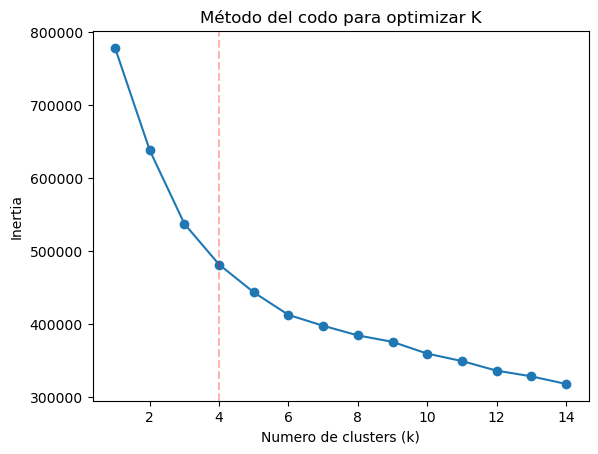

In [24]:
plt.plot(k, inertia, marker = 'o')
plt.title('Método del codo para optimizar K')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Inertia')
plt.axvline(x = 4,color = "red",alpha = 0.3,linestyle = "--")
plt.show

Elegimos el modelo con 4 clusters

In [25]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
clusters = kmeans.fit_predict(data_pesos)

In [26]:
silueta_avg = metrics.silhouette_score(data_pesos, kmeans.labels_, metric = 'euclidean')
print(f'Indice silueta: {silueta_avg}')

Indice silueta: 0.2049021154039127


In [27]:
df_analisis_sinout_sinnif["cluster_kmeans"] = kmeans.labels_

In [28]:
df_analisis_sinout_sinnif["cluster_kmeans"].value_counts()

cluster_kmeans
0    12019
2     9404
1     3816
3      102
Name: count, dtype: int64

In [29]:
df_analisis_sinout_sinnif["Solvencia"].value_counts()

Solvencia
4    8278
3    5706
2    3906
1    3747
0    3704
Name: count, dtype: int64

In [30]:
df_analisis_sinout_sinnif.groupby("cluster_kmeans").mean()

,Provincia_Alava,Provincia_Guipuzcoa,Total activo\nmil EUR\n2022,Empresa reciente,Mapeo Sectores_Actividades Profesionales y Financieras,Mapeo Sectores_Comercio,Mapeo Sectores_Construccion e Inmobilarias,Mapeo Sectores_Hosteleria,Mapeo Sectores_Industria,Mapeo Sectores_Transporte,Moneda no euro,Endeudamiento,Solvencia,Evolucion_ventas,ROA
cluster_kmeans,,,,,,,,,,,,,,,
0,0.152675,0.352941,400.070273,0.076961,0.179965,0.196605,0.220318,0.050587,0.119394,0.039854,0.0,3.371911,3.441301,2.616857,2.409352
1,0.165094,0.362421,2228.887049,0.053459,0.112945,0.198375,0.260744,0.035639,0.206499,0.051887,0.0,2.995807,2.738470,2.844602,2.221436
2,0.142812,0.312101,322.566231,0.141748,0.128031,0.239579,0.215121,0.094960,0.101446,0.039983,0.0,1.566355,1.033390,2.589111,1.586772
3,0.117647,0.362745,1508.638751,0.039216,0.058824,0.450980,0.039216,0.000000,0.392157,0.009804,1.0,2.637255,2.549020,2.745098,2.098039


Analisis de los clusters

In [31]:
df_analisis_sinout["Cluster kmeans"] = kmeans.labels_

In [32]:
df_analisis_sinout_c0 = df_analisis_sinout[df_analisis_sinout["Cluster kmeans"] == 0]
df_analisis_sinout_c1 = df_analisis_sinout[df_analisis_sinout["Cluster kmeans"] == 1]
df_analisis_sinout_c2 = df_analisis_sinout[df_analisis_sinout["Cluster kmeans"] == 2]
df_analisis_sinout_c3 = df_analisis_sinout[df_analisis_sinout["Cluster kmeans"] == 3]

In [33]:
df_total = pd.concat([df_analisis_sinout,df_analisis_out])

In [34]:
df_total

,Código NIF,Provincia_Alava,Provincia_Guipuzcoa,Total activo\nmil EUR\n2022,Empresa reciente,Mapeo Sectores_Actividades Profesionales y Financieras,Mapeo Sectores_Comercio,Mapeo Sectores_Construccion e Inmobilarias,Mapeo Sectores_Hosteleria,Mapeo Sectores_Industria,Mapeo Sectores_Transporte,Moneda no euro,Endeudamiento,Solvencia,Evolucion_ventas,ROA,Cluster kmeans
57,B95798278,False,False,2764.00000,False,False,False,True,False,False,False,False,1,1,4,4,1
64,B95869509,False,False,2826.00000,False,False,False,True,False,False,False,False,1,1,2,4,1
107,B20779468,False,False,3176.44937,False,False,False,False,False,False,False,False,2,2,1,3,1
120,A28784635,False,False,1255.54300,False,False,False,False,False,False,True,False,3,3,4,4,0
146,A48173975,False,False,2959.21695,False,False,False,False,False,False,False,False,3,0,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29331,B01451459,True,False,3727.52321,False,True,False,False,False,False,False,False,1,0,2,0,-1
29334,B01404672,True,False,5137.45046,False,False,False,True,False,False,False,False,1,4,2,1,-1
29337,B01518513,True,False,8474.33033,False,False,False,True,False,False,False,False,1,1,2,1,-1
29339,B01384627,True,False,8116.22665,False,False,False,True,False,False,False,False,1,3,2,2,-1


Empresa reciente:

In [35]:
print(f'Ratio empresa reciente / no reciente c0: {df_analisis_sinout_c0["Empresa reciente"].sum()/(len(df_analisis_sinout_c0)-df_analisis_sinout_c0["Empresa reciente"].sum())}')
print(f'Ratio empresa reciente / no reciente c1: {df_analisis_sinout_c1["Empresa reciente"].sum()/(len(df_analisis_sinout_c1)-df_analisis_sinout_c1["Empresa reciente"].sum())}')
print(f'Ratio empresa reciente / no reciente c2: {df_analisis_sinout_c2["Empresa reciente"].sum()/(len(df_analisis_sinout_c2)-df_analisis_sinout_c2["Empresa reciente"].sum())}')
print(f'Ratio empresa reciente / no reciente c3: {df_analisis_sinout_c3["Empresa reciente"].sum()/(len(df_analisis_sinout_c3)-df_analisis_sinout_c3["Empresa reciente"].sum())}')
print(f'Ratio empresa reciente / no reciente c-1: {df_analisis_out["Empresa reciente"].sum()/(len(df_analisis_out)-df_analisis_out["Empresa reciente"].sum())}')

Ratio empresa reciente / no reciente c0: 0.08337840274021995
Ratio empresa reciente / no reciente c1: 0.05647840531561462
Ratio empresa reciente / no reciente c2: 0.16515921199355718
Ratio empresa reciente / no reciente c3: 0.04081632653061224
Ratio empresa reciente / no reciente c-1: 0.05294888597640891


## CLUSTERING JERARQUICO

In [36]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [37]:
df_analisis_sinind.columns

Index(['Provincia_Alava', 'Provincia_Guipuzcoa', 'Total activo\nmil EUR\n2022',
       'Empresa reciente',
       'Mapeo Sectores_Actividades Profesionales y Financieras',
       'Mapeo Sectores_Comercio', 'Mapeo Sectores_Construccion e Inmobilarias',
       'Mapeo Sectores_Hosteleria', 'Mapeo Sectores_Industria',
       'Mapeo Sectores_Transporte', 'Moneda no euro', 'Endeudamiento',
       'Solvencia', 'Evolucion_ventas', 'ROA'],
      dtype='object')

In [38]:
linkage_matrix = linkage(data_pesos, method = 'ward')

In [39]:
plt.figure(figsize=(12,6))
dendrogram(linkage_matrix, labels=df_analisis_sinout_sinnif.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendograma Jerarquico')
plt.ylabel('Distancia')
plt.show()

In [ ]:
n_clusters = 4
model = AgglomerativeClustering(n_clusters = n_clusters, connectivity=None, linkage = 'ward', distance_threshold = None)
clusters = model.fit_predict(data_pesos)

df_analisis_sinout_sinnif['Cluster_jerar'] = clusters

In [ ]:
df_analisis_sinout_sinnif["Cluster_jerar"].value_counts()

Cluster_jerar
0    14773
1     8790
3     1676
2      102
Name: count, dtype: int64

In [ ]:
df_analisis_sinout_sinnif.groupby("Cluster_jerar").mean()

,Provincia_Alava,Provincia_Guipuzcoa,Total activo\nmil EUR\n2022,Empresa reciente,Mapeo Sectores_Actividades Profesionales y Financieras,Mapeo Sectores_Comercio,Mapeo Sectores_Construccion e Inmobilarias,Mapeo Sectores_Hosteleria,Mapeo Sectores_Industria,Mapeo Sectores_Transporte,Moneda no euro,Endeudamiento,Solvencia,Evolucion_ventas,ROA,cluster_kmeans
Cluster_jerar,,,,,,,,,,,,,,,,
0,0.136668,0.334529,314.364490,0.143640,0.142287,0.296893,0.199350,0.104583,0.075814,0.000000,0.0,2.229811,1.963718,2.626278,1.813714,1.158939
1,0.173606,0.338453,809.478637,0.036519,0.171217,0.071900,0.264733,0.000000,0.184187,0.119795,0.0,3.253242,3.164846,2.618544,2.487600,0.435495
2,0.117647,0.362745,1508.638751,0.039216,0.058824,0.450980,0.039216,0.000000,0.392157,0.009804,1.0,2.637255,2.549020,2.745098,2.098039,3.000000
3,0.156921,0.383652,2737.390572,0.011337,0.113962,0.211814,0.235084,0.054893,0.261337,0.000000,0.0,3.073986,2.804296,2.887828,2.205847,0.999403


In [ ]:
silhouette_avg = metrics.silhouette_score(data_pesos, clusters)
print(f'Índice de Silueta: {silhouette_avg}')

Índice de Silueta: 0.09672806305148762


In [ ]:
sil_sc = {}
# print(f'Indice silueta: {silueta_avg}')
for n_clusters in range(2,6):
    model = AgglomerativeClustering(n_clusters = n_clusters, connectivity=None, linkage = 'ward', distance_threshold = None)
    clusters = model.fit_predict(data_pesos)
    silueta_avg = metrics.silhouette_score(data_pesos, clusters, metric = 'euclidean')
    sil_sc[str(n_clusters)] = silueta_avg


In [ ]:
sil_sc

{'2': 0.8421810439722411,
 '3': 0.2951319285800013,
 '4': 0.33767973808073654,
 '5': 0.2643761114069336}

In [ ]:
model = AgglomerativeClustering(n_clusters = 5, connectivity=None, linkage = 'ward', distance_threshold = None)
clusters = model.fit_predict(data_pesos)

In [ ]:
clust = OPTICS(min_samples=3, xi=0.1, min_cluster_size=0.05)
clus_opt = clust.fit_predict(df_analisis_sinind)

In [ ]:
df_analisis_sinind["clus_opt"] = clus_opt

In [ ]:
df_analisis_sinind["clus_opt"].value_counts()

clus_opt
 0    23947
-1     5411
Name: count, dtype: int64